In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare WA_Fn-UseC_-Telco-Customer-Churn dataset
print("Loading WA_Fn-UseC_-Telco-Customer-Churn dataset...")
df = pd.read_csv('data_files/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert the totalCharges column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nDataset info:")
print(df.info())

print("\nFirst few rows:")
df.head()

Loading WA_Fn-UseC_-Telco-Customer-Churn dataset...
Dataset shape: (7043, 21)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data exploration

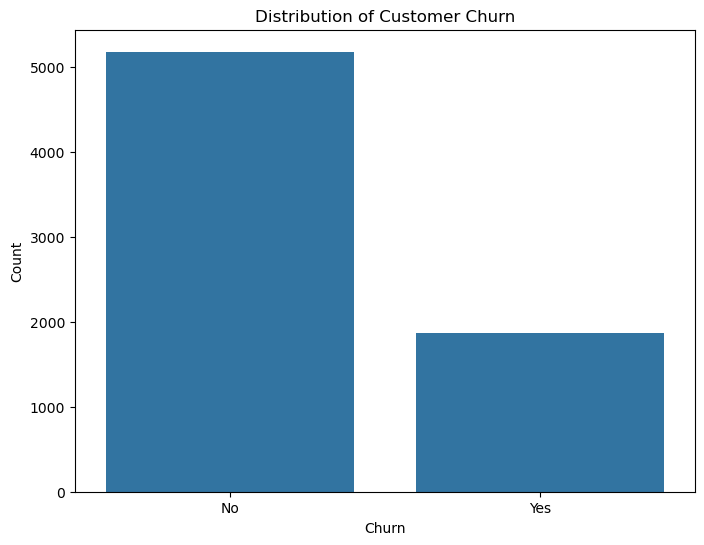

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

<Figure size 1200x1000 with 0 Axes>

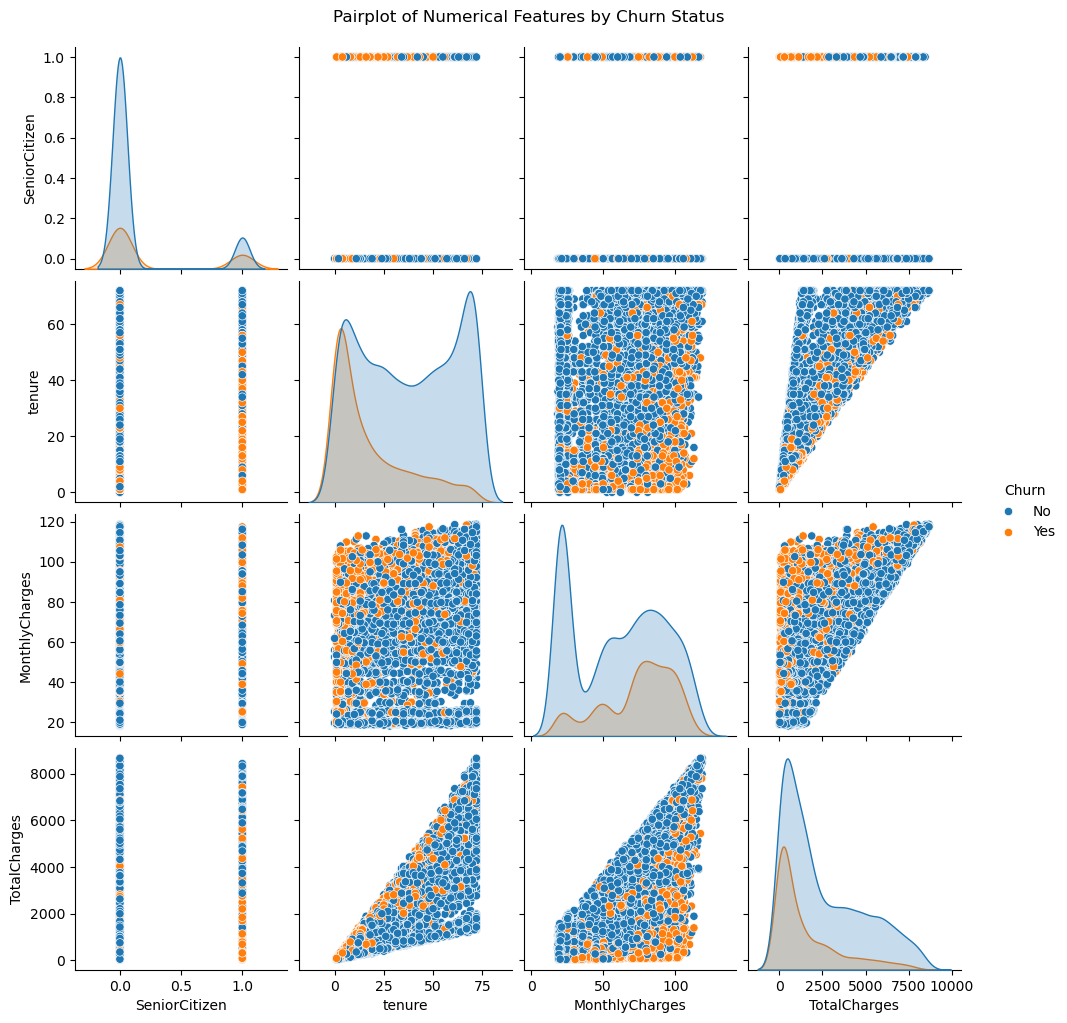

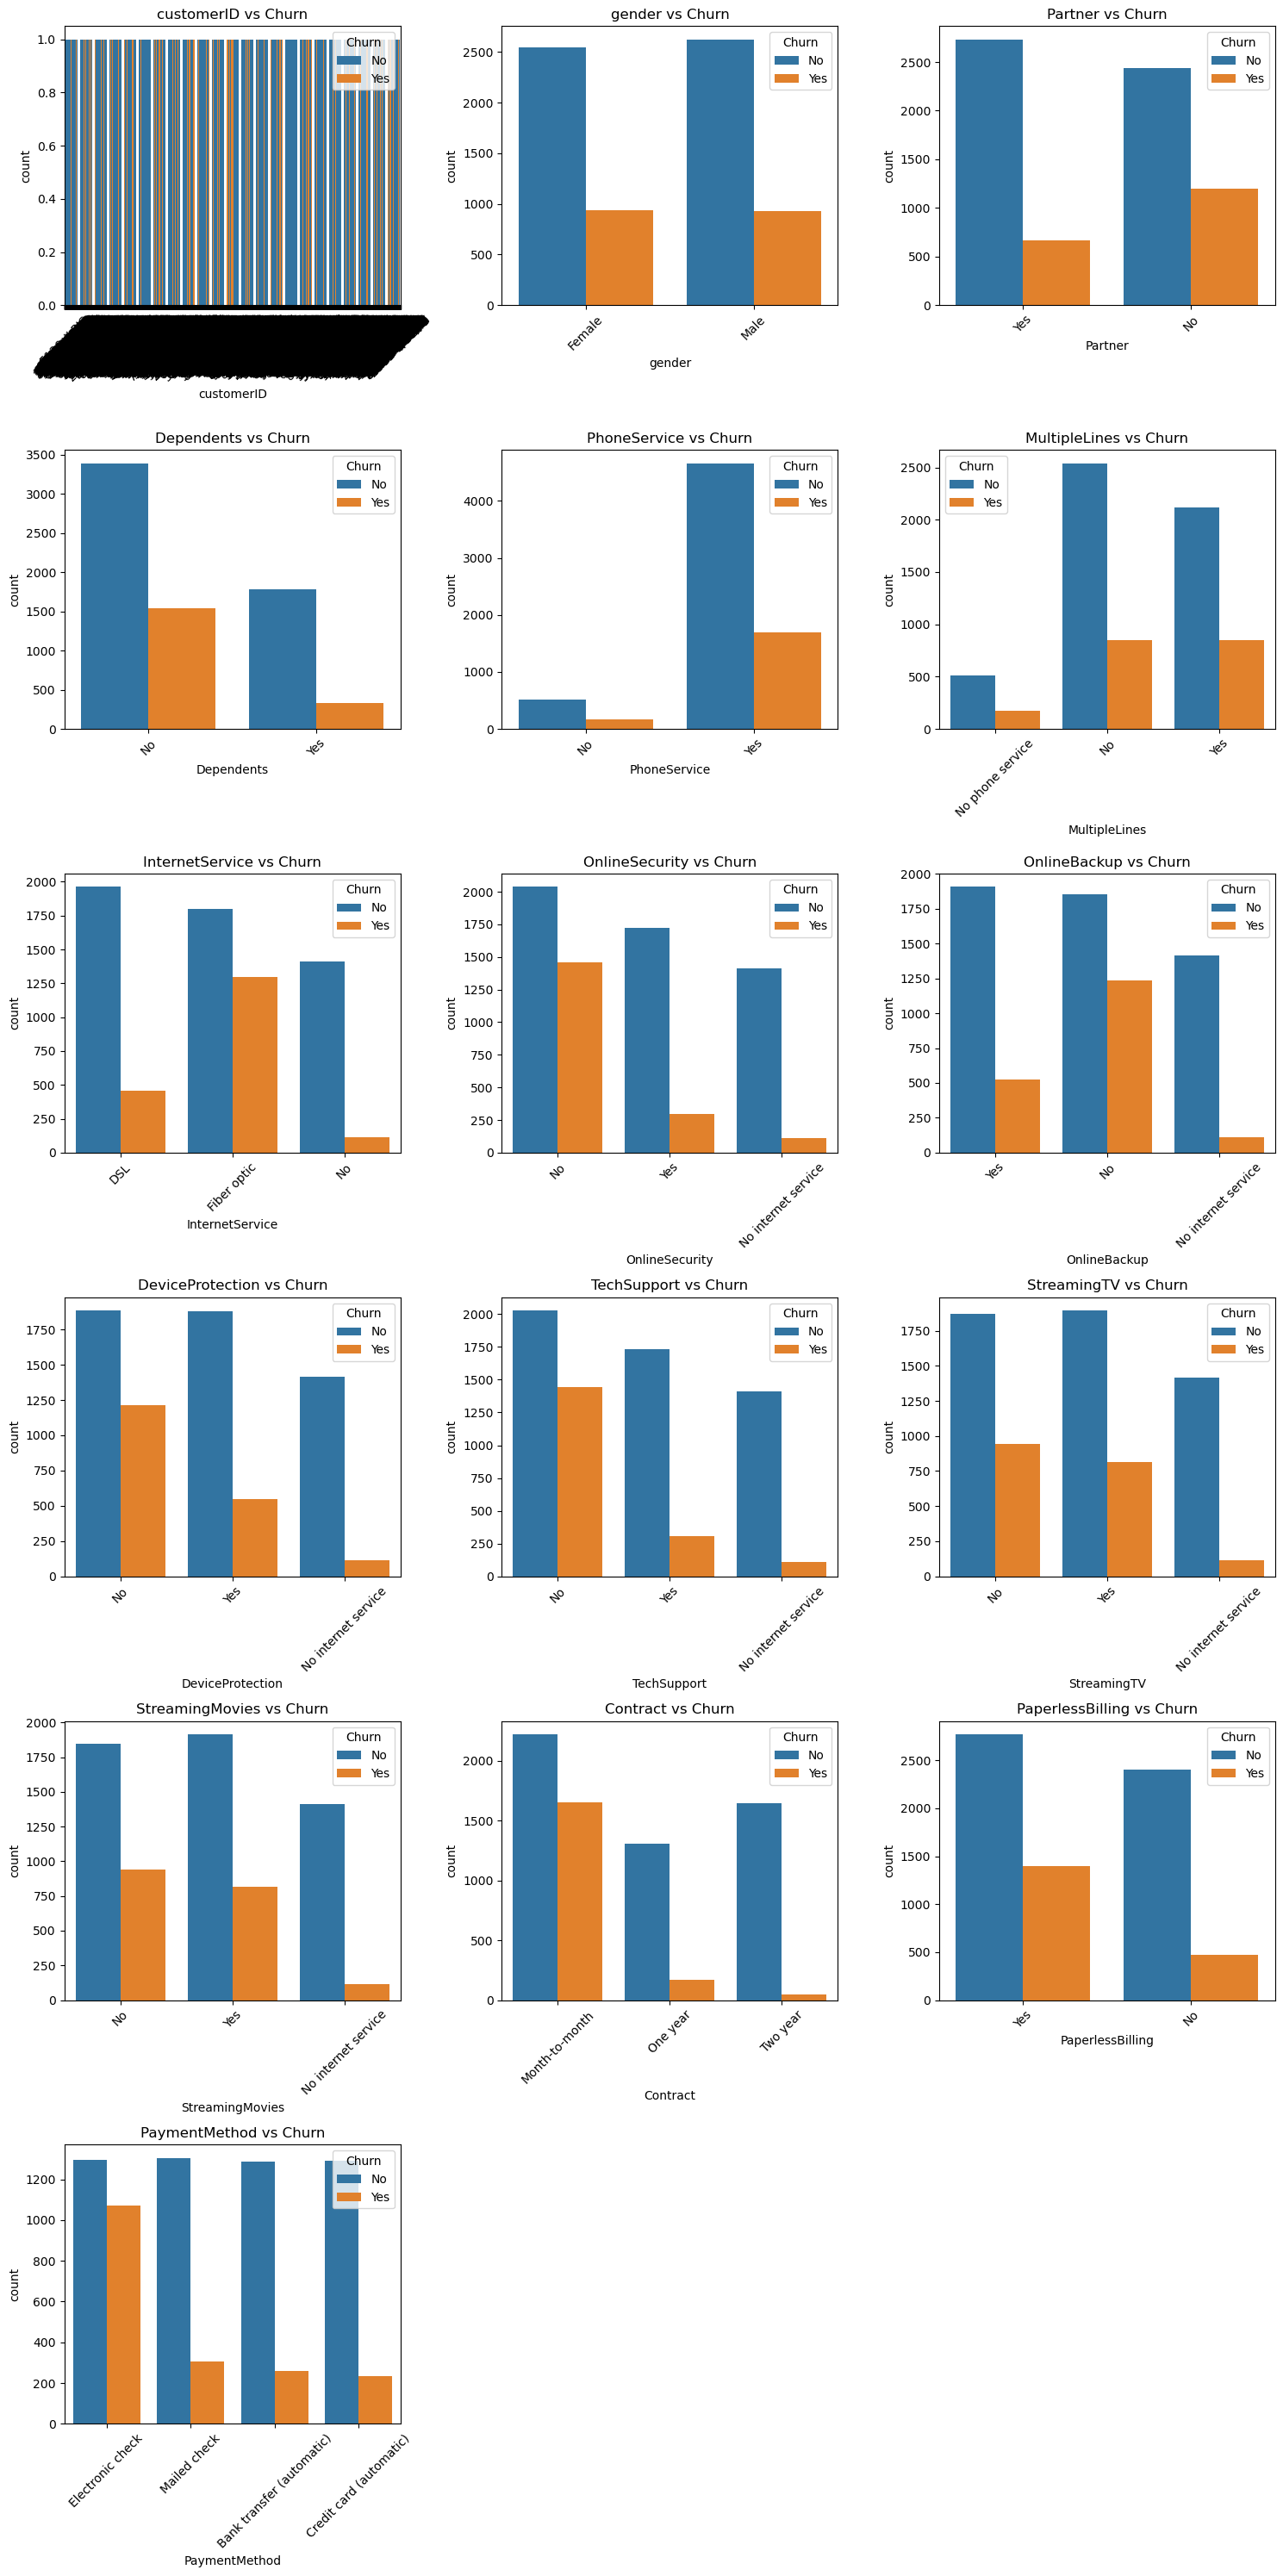

In [4]:
# Pairplot to explore relationships between numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(12, 10))
sns.pairplot(data=df[numerical_cols + ['Churn']], hue='Churn')
plt.suptitle('Pairplot of Numerical Features by Churn Status', y=1.02)
plt.show()

# Count plots for categorical features vs Churn
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')  # Remove target variable from the list

# Calculate grid dimensions
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()


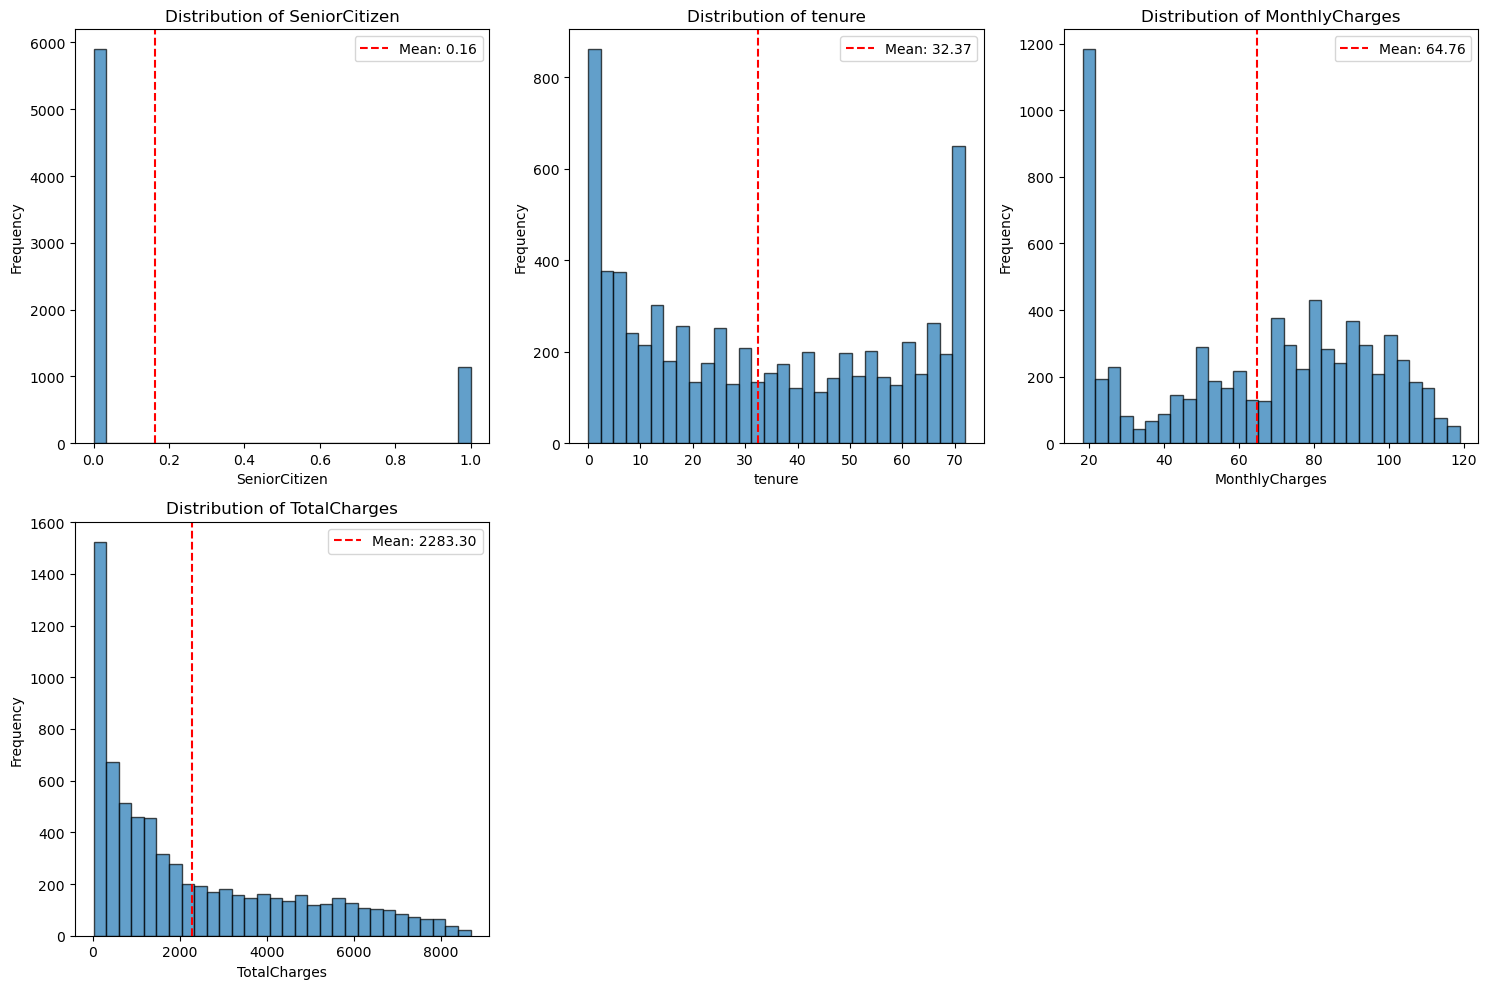

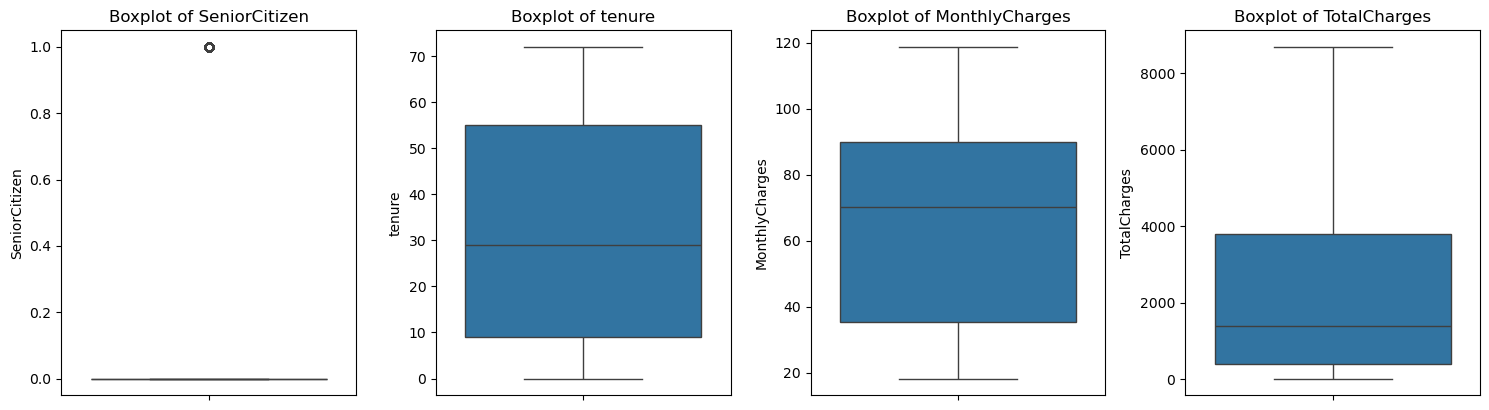

Summary Statistics for Numerical Features:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Skewness of Numerical Features:
SeniorCitizen: 1.834
tenure: 0.240
MonthlyCharges: -0.221
TotalCharges: 0.962


In [5]:
# Distribution analysis of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create histograms for all numerical features
plt.figure(figsize=(15, 10))
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Add basic statistics as text
    mean_val = df[col].mean()
    std_val = df[col].std()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Summary statistics
print("Summary Statistics for Numerical Features:")
print("=" * 50)
print(df[numerical_cols].describe())

# Check for skewness
print("\nSkewness of Numerical Features:")
print("=" * 35)
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"{col}: {skewness:.3f}")
    

## Data processing: encoding

In [6]:
# Convert categorical variables to numeric representation
print("Converting categorical variables to numeric representation...")
print("=" * 55)

# Remove Phone feature as it's not useful for prediction (unique identifier)
if 'Phone' in df.columns:
    df = df.drop('Phone', axis=1)
    print("Removed 'Phone' column as it's a unique identifier not useful for prediction")
    print(f"Dataset shape after removing Phone: {df.shape}")
    print()


# Get categorical columns (excluding customerID which is just an identifier)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

print(f"Categorical columns to convert: {categorical_cols}")
print()

# Create a copy of the dataframe for encoding and remove null data
df = df.dropna()
print(f"Removed null values. Dataset shape after removing nulls: {df.shape}")
df_encoded = df.copy() 

# Method 1: Label Encoding for binary categorical variables
from sklearn.preprocessing import LabelEncoder

binary_categorical = []
multi_categorical = []

# Identify binary vs multi-category variables
for col in categorical_cols:
    unique_values = df[col].nunique()
    if unique_values == 2:
        binary_categorical.append(col)
    else:
        multi_categorical.append(col)

print("Binary categorical variables (using Label Encoding):")
print(binary_categorical)
print()

# Apply Label Encoding to binary categorical variables
label_encoders = {}
for col in binary_categorical:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print()
print("Multi-categorical variables (using One-Hot Encoding):")
print(multi_categorical)
print()

# Method 2: One-Hot Encoding for multi-categorical variables
if multi_categorical:
    df_encoded = pd.get_dummies(df_encoded, columns=multi_categorical, prefix=multi_categorical, drop_first=True)

# Display the shape change
print(f"Original dataset shape: {df.shape}")
print(f"Encoded dataset shape: {df_encoded.shape}")
print()

# Show first few rows of encoded data
print("First 5 rows of encoded dataset:")
df_encoded.info()

# Scale numerical features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns (excluding the target variable if it exists)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable if it exists in the dataset
target_candidates = ['churn', 'Churn', 'target', 'Target']
for target in target_candidates:
    if target in numerical_cols:
        numerical_cols.remove(target)


# Apply Min-Max scaling to range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print()
print("First 5 rows of scaled dataset:")
df_scaled.head()

Converting categorical variables to numeric representation...
Categorical columns to convert: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Removed null values. Dataset shape after removing nulls: (7032, 21)
Binary categorical variables (using Label Encoding):
['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Partner: {'No': np.int64(0), 'Yes': np.int64(1)}
Dependents: {'No': np.int64(0), 'Yes': np.int64(1)}
PhoneService: {'No': np.int64(0), 'Yes': np.int64(1)}
PaperlessBilling: {'No': np.int64(0), 'Yes': np.int64(1)}
Churn: {'No': np.int64(0), 'Yes': np.int64(1)}

Multi-categorical variables (using One-Hot Encoding):
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtect

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-1.0,-1.0,1.0,-1.0,-1.000000,-1.0,1.0,-0.769154,-0.997450,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1.0,-1.0,-1.0,-1.0,-0.070423,1.0,-1.0,-0.229851,-0.568267,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1.0,-1.0,-1.0,-1.0,-0.971831,1.0,1.0,-0.291542,-0.979379,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1.0,-1.0,-1.0,-1.0,0.239437,-1.0,-1.0,-0.521393,-0.579518,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,-1.0,-1.0,-1.0,-1.0,-0.971831,1.0,1.0,0.043781,-0.969340,...,False,False,False,False,False,False,False,False,True,False


## Random Forest- Hypertuning

### Prepare Data

In [7]:
# Prepare data for Random Forest hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare features and target
X = df_scaled.drop('Churn', axis=1) if 'Churn' in df_scaled.columns else df_scaled.drop('churn', axis=1)
y = df_scaled['Churn'] if 'Churn' in df_scaled.columns else df_scaled['churn']

# Identify the target column
target_col = None
for col in ['churn', 'Churn', 'target', 'Target']:
    if col in df_scaled.columns:
        target_col = col
        break

if target_col is None:
    print("Warning: No target column found. Please specify the target column manually.")
    # Assuming the last column is the target for demonstration
    target_col = df_scaled.columns[-1]

print(f"Using '{target_col}' as target variable")

# Remove customerID column (identifier, not useful for prediction)
if 'customerID' in df_scaled.columns:
    df_scaled = df_scaled.drop('customerID', axis=1)
    print("Removed customerID column (identifier)")

# Separate features and target
X = df_scaled.drop(columns=[target_col])
y = df_scaled[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")
print()

# Check for any remaining object columns
object_columns = X.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print(f"Warning: Found object columns: {list(object_columns)}")
    print("Removing object columns...")
    X = X.drop(object_columns, axis=1)
    print(f"Features shape after removing objects: {X.shape}")

Using 'Churn' as target variable
Removed customerID column (identifier)
Features shape: (7032, 30)
Target shape: (7032,)
Target distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64



### Find Hyper-parameter for optimal accuracy

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Define parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [4, 8, 16],
    'max_features': ['log2'],
    'class_weight': [None]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross Validation
print("Starting Grid Search with 5-fold Cross Validation...")
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display best parameters and score
print("\nBest Parameters:")
print(grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")

# Get the best model
best_rf_accuracy = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_rf_accuracy, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train the best model on full training set and evaluate
best_rf_accuracy.fit(X_train, y_train)
y_pred = best_rf_accuracy.predict(X_test)

print(f"\nTest Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training set size: (5625, 30)
Test set size: (1407, 30)
Starting Grid Search with 5-fold Cross Validation...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters:
{'class_weight': None, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}

Best Cross-Validation Score: 0.8048

Cross-Validation Scores: [0.80355556 0.83288889 0.80888889 0.78666667 0.792     ]
Mean CV Score: 0.8048 (+/- 0.0322)

Test Set Accuracy: 0.7903

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [9]:

# Save the best model to a pickle file
import pickle

with open('best_rf_accuracy_model.pkl', 'wb') as f:
    pickle.dump(best_rf_accuracy, f)
    
print("Model saved as 'best_rf_accuracy_model.pkl'")


Model saved as 'best_rf_accuracy_model.pkl'


### Find Hyper-parameter for optimal recall for churn class

In [10]:
from sklearn.metrics import make_scorer, f1_score, recall_score

# Create a scorer that targets a specific class
metric_class1 = make_scorer(recall_score, pos_label=1, average='binary')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Define parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4, 8],
    'max_features': [ 'log2'],
    'class_weight': ['balanced']
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross Validation
print("Starting Grid Search with 5-fold Cross Validation...")
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring=metric_class1,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display best parameters and score
print("\nBest Parameters:")
print(grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")

# Get the best model
best_rf = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring=metric_class1)
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train the best model on full training set and evaluate
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print(f"\nTest Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Training set size: (5625, 30)
Test set size: (1407, 30)
Starting Grid Search with 5-fold Cross Validation...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters:
{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 250}

Best Cross-Validation Score: 0.7585

Cross-Validation Scores: [0.75585284 0.78929766 0.76588629 0.69230769 0.78929766]
Mean CV Score: 0.7585 (+/- 0.0712)

Test Set Accuracy: 0.7491

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407




AUC Score: 0.8389


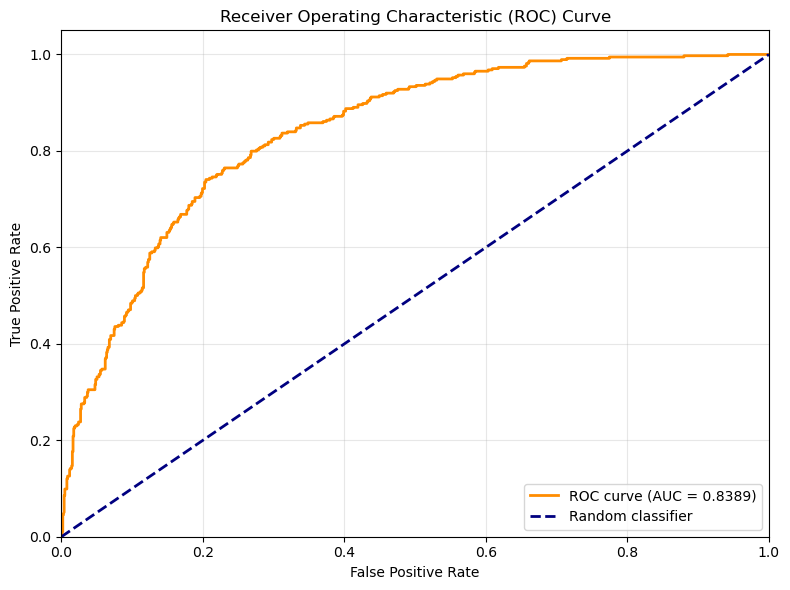

In [20]:
import pickle

# Save the best recall model to pickle file
with open('best_rf_recall_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Calculate AUC for the best model
from sklearn.metrics import roc_auc_score, roc_curve

# Get prediction probabilities for AUC calculation
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for positive class (churn)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC Score: {auc_score:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Feature important

Feature Importances (Top 10):
                                feature  importance
4                                tenure    0.180132
8                          TotalCharges    0.128514
26                    Contract_Two year    0.105834
7                        MonthlyCharges    0.082580
11          InternetService_Fiber optic    0.068277
28       PaymentMethod_Electronic check    0.063388
25                    Contract_One year    0.046571
14                   OnlineSecurity_Yes    0.035415
20                      TechSupport_Yes    0.030920
23  StreamingMovies_No internet service    0.022144


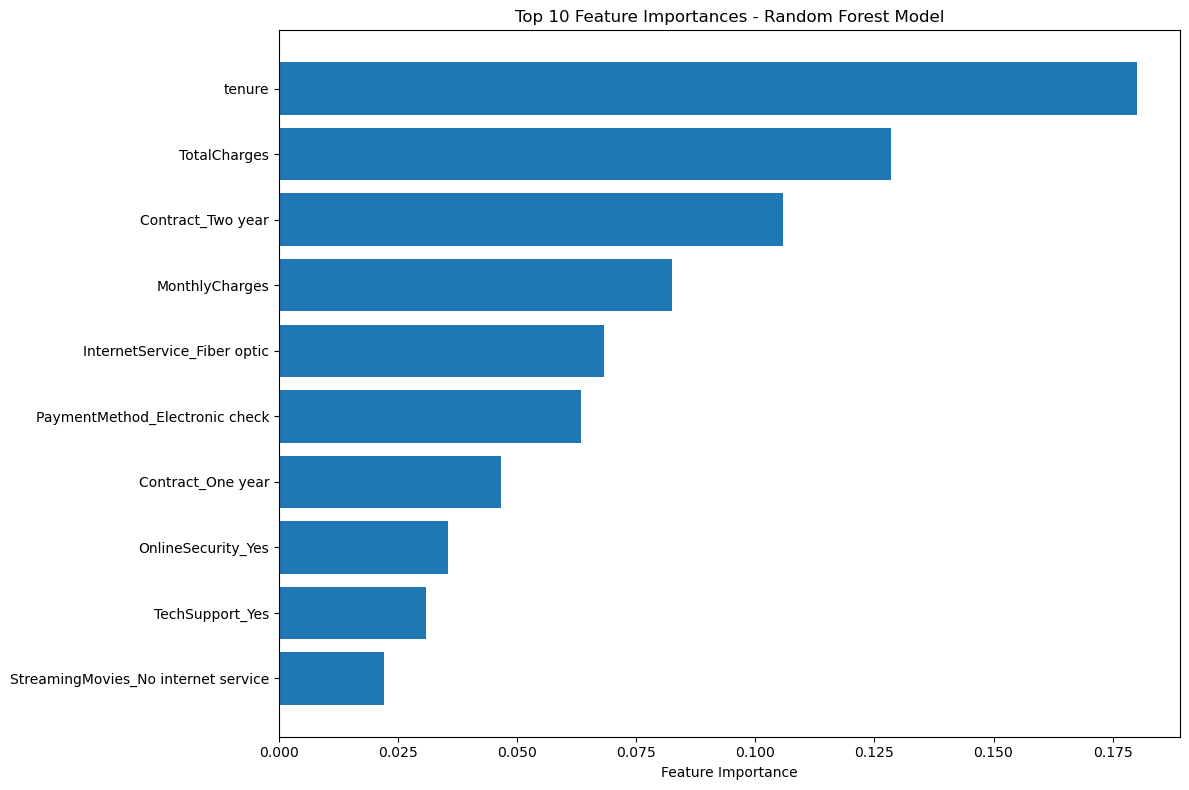


Top 5 features account for 56.53% of total importance
Top 10 features account for 76.38% of total importance


In [19]:
# Extract feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a dataframe for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

print("Feature Importances (Top 10):")
print(importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
top_features = importance_df.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Display cumulative importance
cumulative_importance = np.cumsum(importance_df['importance'])
print(f"\nTop 5 features account for {cumulative_importance.iloc[4]:.2%} of total importance")
print(f"Top 10 features account for {cumulative_importance.iloc[9]:.2%} of total importance")


## Analysis Learning curve for best model

### before tuning


Generating Learning Curves for Random Forest Model (Before Hyperparameter Tuning)...
Random Forest Model Configuration:
  n_estimators: 100
  max_depth: None
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: sqrt
  bootstrap: True
  random_state: 42



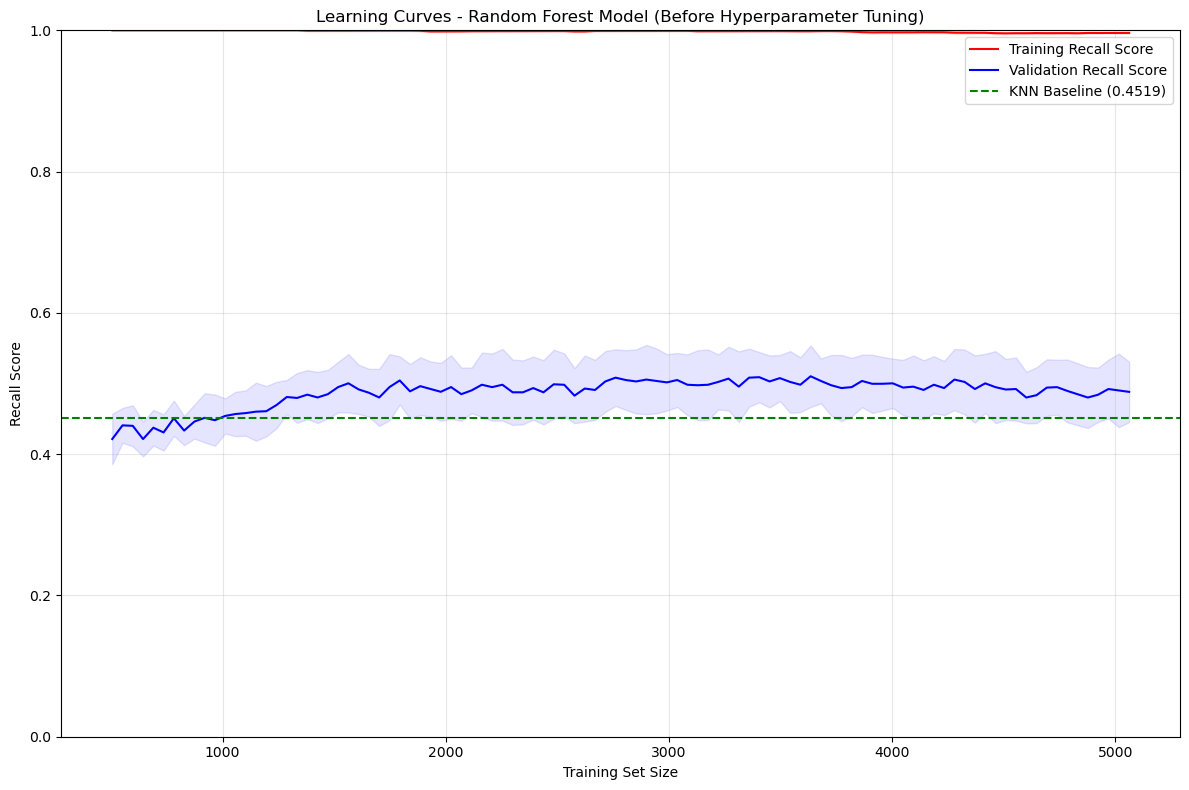


Learning Curve Performance Analysis:
KNN Baseline Recall Score: 0.4519
Training Recall Score Range: 0.9958 - 1.0000
Validation Recall Score Range: 0.4214 - 0.5103
Final Training Recall Score: 0.9964 (+/- 0.0010)
Final Validation Recall Score: 0.4882 (+/- 0.0428)

Model Analysis: Shows signs of overfitting (training-validation gap: 0.5081)
Performance vs Baseline: 0.0363 improvement (8.04% relative gain)


In [12]:
# Generate learning curves to analyze model performance across different training set sizes
from sklearn.model_selection import learning_curve

print("\nGenerating Learning Curves for Random Forest Model (Before Hyperparameter Tuning)...")

# Define training set sizes for comprehensive analysis
train_sizes = np.linspace(0.1, 1.0, 100)

# Create baseline Random Forest model with default-like parameters
random_forest_model = RandomForestClassifier(random_state=42)
# Print the model configuration
print("Random Forest Model Configuration:")
print(f"  n_estimators: {random_forest_model.n_estimators}")
print(f"  max_depth: {random_forest_model.max_depth}")
print(f"  min_samples_split: {random_forest_model.min_samples_split}")
print(f"  min_samples_leaf: {random_forest_model.min_samples_leaf}")
print(f"  max_features: {random_forest_model.max_features}")
print(f"  bootstrap: {random_forest_model.bootstrap}")
print(f"  random_state: {random_forest_model.random_state}")
print()

# Calculate learning curves using recall as the primary metric
train_sizes_abs, train_scores, val_scores = learning_curve(
    random_forest_model, 
    X_train, 
    y_train,
    train_sizes=train_sizes,
    cv=10,
    scoring='recall',
    n_jobs=-1,
    random_state=43
)

# Calculate mean and standard deviation for training and validation scores
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
val_score_mean = np.mean(val_scores, axis=1)
val_score_std = np.std(val_scores, axis=1)

# Establish baseline performance using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Create KNN baseline model with k=8 (approximated from ln(sample_size))
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
baseline_score = recall_score(y_test, y_test_pred, pos_label=1)


# Create comprehensive learning curve visualization
plt.figure(figsize=(12, 8))
plt.plot(train_sizes_abs, train_score_mean, '-', color='red', label='Training Recall Score')
plt.fill_between(train_sizes_abs, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1, color='red')

plt.plot(train_sizes_abs, val_score_mean, '-', color='blue', label='Validation Recall Score')
plt.fill_between(train_sizes_abs, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color='blue')




plt.axhline(y=baseline_score, color='green', linestyle='--', label=f'KNN Baseline ({baseline_score:.4f})')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.title('Learning Curves - Random Forest Model (Before Hyperparameter Tuning)')
plt.ylim(0.0, 1)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Provide detailed performance analysis
print(f"\nLearning Curve Performance Analysis:")
print(f"KNN Baseline Recall Score: {baseline_score:.4f}")
print(f"Training Recall Score Range: {train_score_mean.min():.4f} - {train_score_mean.max():.4f}")
print(f"Validation Recall Score Range: {val_score_mean.min():.4f} - {val_score_mean.max():.4f}")
print(f"Final Training Recall Score: {train_score_mean[-1]:.4f} (+/- {train_score_std[-1]:.4f})")
print(f"Final Validation Recall Score: {val_score_mean[-1]:.4f} (+/- {val_score_std[-1]:.4f})")

# Analyze model generalization and potential overfitting
generalization_gap = train_score_mean[-1] - val_score_mean[-1]
if generalization_gap > 0.05:
    print(f"\nModel Analysis: Shows signs of overfitting (training-validation gap: {generalization_gap:.4f})")
elif generalization_gap < 0.01:
    print(f"\nModel Analysis: Demonstrates excellent generalization (training-validation gap: {generalization_gap:.4f})")
else:
    print(f"\nModel Analysis: Shows acceptable generalization (training-validation gap: {generalization_gap:.4f})")

# Compare performance improvement over baseline
performance_improvement = val_score_mean[-1] - baseline_score
relative_improvement = performance_improvement / baseline_score
print(f"Performance vs Baseline: {performance_improvement:.4f} improvement ({relative_improvement:.2%} relative gain)")

### best recall model


Generating Learning Curves...
(5625, 30)


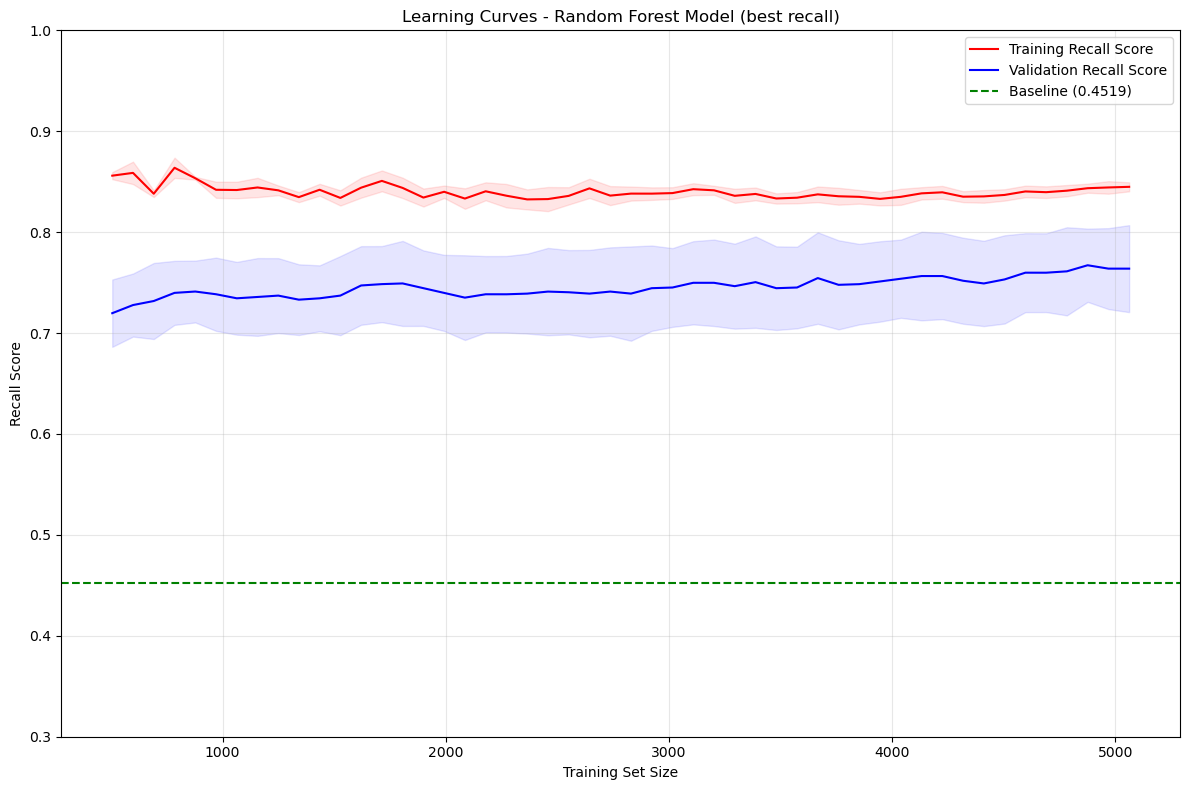


Learning Curve Analysis:
Baseline error: 0.4519
Training error range: 0.8325 - 0.8638
Validation error range: 0.7197 - 0.7672
Final training error: 0.8449 (+/- 0.0045)
Final validation error: 0.7638 (+/- 0.0431)

Model shows good generalization (gap: -0.0811)
Improvement over baseline: -0.3120 (-69.04% relative improvement)


In [13]:
# Generate learning curves to see how performance changes with training set size
from sklearn.model_selection import learning_curve

print("\nGenerating Learning Curves...")

# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 50)
print(X_train.shape)
# Calculate learning curves
train_sizes_abs, train_scores, val_scores = learning_curve(
    best_rf, 
    X_train, 
    y_train,
    train_sizes=train_sizes,
    cv=10,
    scoring='recall',
    n_jobs=-1,
    random_state=43
)

# Convert accuracy to error (1 - accuracy)
train_errors_mean = np.mean(train_scores, axis=1)
train_errors_std = np.std(train_scores, axis=1)
val_score_mean = np.mean(val_scores, axis=1)
val_errors_std = np.std(val_scores, axis=1)

# Using KNN as baseline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
# Create KNN model with k=8 (ln(5000))
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
recall_knn = recall_score(y_test, y_test_pred, pos_label=1)  # pos_label=1 for 'churn'
recall_error = recall_knn

# Plot learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_sizes_abs, train_errors_mean, '-', color='red', label='Training Recall Score')
plt.fill_between(train_sizes_abs, train_errors_mean - train_errors_std,
                 train_errors_mean + train_errors_std, alpha=0.1, color='red')

plt.plot(train_sizes_abs, val_score_mean, '-', color='blue', label='Validation Recall Score')
plt.fill_between(train_sizes_abs, val_score_mean - val_errors_std,
                 val_score_mean + val_errors_std, alpha=0.1, color='blue')

plt.axhline(y=recall_error, color='green', linestyle='--', label=f'Baseline ({recall_error:.4f})')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.title('Learning Curves - Random Forest Model (best recall)')
plt.ylim(0.3, 1)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print learning curve statistics
print(f"\nLearning Curve Analysis:")
print(f"Baseline error: {recall_error:.4f}")
print(f"Training error range: {train_errors_mean.min():.4f} - {train_errors_mean.max():.4f}")
print(f"Validation error range: {val_score_mean.min():.4f} - {val_score_mean.max():.4f}")
print(f"Final training error: {train_errors_mean[-1]:.4f} (+/- {train_errors_std[-1]:.4f})")
print(f"Final validation error: {val_score_mean[-1]:.4f} (+/- {val_errors_std[-1]:.4f})")

# Check for overfitting/underfitting
gap = val_score_mean[-1] - train_errors_mean[-1]
if gap > 0.05:
    print(f"\nModel shows signs of overfitting (gap: {gap:.4f})")
elif gap < 0.01:
    print(f"\nModel shows good generalization (gap: {gap:.4f})")
else:
    print(f"\nModel shows acceptable generalization (gap: {gap:.4f})")

# Compare with baseline
improvement = recall_error - val_score_mean[-1]
print(f"Improvement over baseline: {improvement:.4f} ({improvement/recall_error:.2%} relative improvement)")

## Best accuracy


Generating Learning Curves...


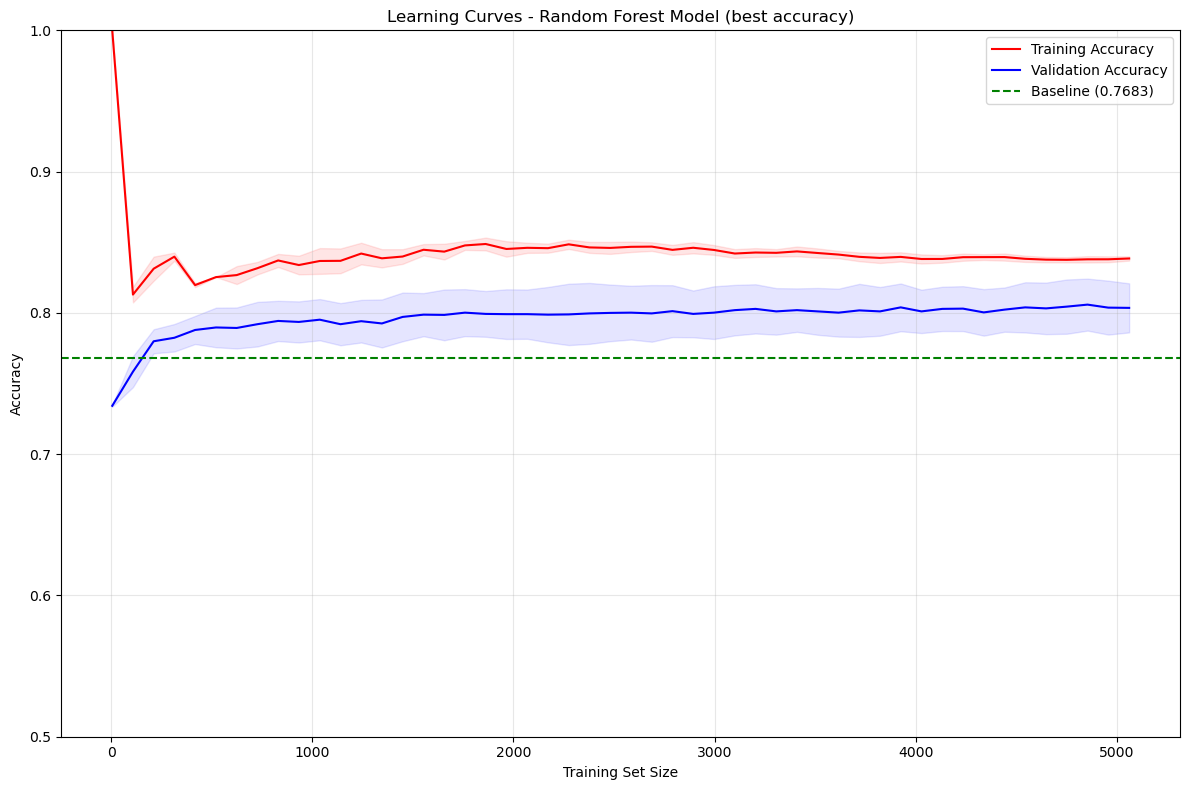


Learning Curve Analysis:
Baseline accuracy: 0.7683
Training accuracy range: 0.8130 - 1.0000
Validation accuracy range: 0.7342 - 0.8059
Final training accuracy: 0.8385 (+/- 0.0015)
Final validation accuracy: 0.8035 (+/- 0.0174)

Model shows acceptable generalization (gap: 0.0350)
Improvement over baseline: 0.0352 (4.59% relative improvement)


In [14]:
# Generate learning curves to see how performance changes with training set size
from sklearn.model_selection import learning_curve

print("\nGenerating Learning Curves...")

# Define training set sizes
train_sizes = np.linspace(0.001, 1, 50)

# Calculate learning curves
train_sizes_abs, train_scores, val_scores = learning_curve(
    best_rf_accuracy, 
    X_train, 
    y_train,
    train_sizes=train_sizes,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Calculate accuracy means and standard deviations
train_accuracy_mean = np.mean(train_scores, axis=1)
train_accuracy_std = np.std(train_scores, axis=1)
val_accuracy_mean = np.mean(val_scores, axis=1)
val_accuracy_std = np.std(val_scores, axis=1)

# Using KNN as baseline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
# Create KNN model with k=8 (ln(5000))
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_test_pred)

# Plot learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_sizes_abs, train_accuracy_mean, '-', color='red', label='Training Accuracy')
plt.fill_between(train_sizes_abs, train_accuracy_mean - train_accuracy_std,
                 train_accuracy_mean + train_accuracy_std, alpha=0.1, color='red')

plt.plot(train_sizes_abs, val_accuracy_mean, '-', color='blue', label='Validation Accuracy')
plt.fill_between(train_sizes_abs, val_accuracy_mean - val_accuracy_std,
                 val_accuracy_mean + val_accuracy_std, alpha=0.1, color='blue')

plt.axhline(y=accuracy_knn, color='green', linestyle='--', label=f'Baseline ({accuracy_knn:.4f})')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Random Forest Model (best accuracy)')
plt.ylim(0.5, 1)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print learning curve statistics
print(f"\nLearning Curve Analysis:")
print(f"Baseline accuracy: {accuracy_knn:.4f}")
print(f"Training accuracy range: {train_accuracy_mean.min():.4f} - {train_accuracy_mean.max():.4f}")
print(f"Validation accuracy range: {val_accuracy_mean.min():.4f} - {val_accuracy_mean.max():.4f}")
print(f"Final training accuracy: {train_accuracy_mean[-1]:.4f} (+/- {train_accuracy_std[-1]:.4f})")
print(f"Final validation accuracy: {val_accuracy_mean[-1]:.4f} (+/- {val_accuracy_std[-1]:.4f})")

# Check for overfitting/underfitting
gap = train_accuracy_mean[-1] - val_accuracy_mean[-1]
if gap > 0.05:
    print(f"\nModel shows signs of overfitting (gap: {gap:.4f})")
elif gap < 0.01:
    print(f"\nModel shows good generalization (gap: {gap:.4f})")
else:
    print(f"\nModel shows acceptable generalization (gap: {gap:.4f})")

# Compare with baseline
improvement = val_accuracy_mean[-1] - accuracy_knn
print(f"Improvement over baseline: {improvement:.4f} ({improvement/accuracy_knn:.2%} relative improvement)")